# Домашнее задание №2
**Постановка задачи**

Провести мини-исследование рынка строящейся недвижимости в одном или нескольких регионах с помощью pandas, matplotlib, seaborn, plotly и других инструментов.
- Рассчитать средние цены за квадратный метр по регионам. Важно чтобы пропуски не учитывались при расчете средней цены.
- Рассчитать объемы вводимого жилья по регионам и по годам.
- Сравнить этажность домов, количество квартир, жилую площадь, количество парковочных мест и цену за квадратный метр в разных регионах
- Визуализировать разброс, связь и распределение этих показателей по регионам
- Сделать выводы по каждому из расчетов и графиков

## Подготовительные действия

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

## Получение данных

In [3]:
# загрузим данные из pickl-а, полученного в предыдущем ДЗ
data = pd.read_pickle('full_data.pickle')

## Предобработка данных

In [4]:
# выведем первые 10 строк датафрейма
display(data.head(10))

,id,pdId,region,address,nameObj,floorMin,floorMax,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,objLkFinishTypeDesc,objLkFreePlanDesc,objElemParkingCnt,objSquareLiving,rpdNum,rpdPdfLink,rpdIssueDttm,objLkLatitude,objLkLongitude,objCompensFundFlg,objProblemFlg,objLkClassDesc,loadDttm,photoRenderDTO,objGuarantyEscrowFlg,objectType,miniUrl,residentialBuildings,newBuildingId,objFloorCnt,objFlatCnt,objFlatSq,objNonlivElemCnt,objStatus,isAvailableWantLiveHere,objTransferPlanDt,objLivCeilingHeight,objInfrstrBicycleLaneFlg,objInfrstrPlaygrndCnt,objInfrstrSportGroundCnt,objInfrstrTrashAreaCnt,objInfrstrObjPrkngCnt,objInfrstrNotObjPrkngCnt,objInfrstrRampFlg,objInfrstrCurbLoweringFlg,objElevatorWheelchairCnt,objElevatorPassengerCnt,objElevatorCargoCnt,soldOutPerc,objPriceAvg,nonlivFirstFloor,objectTransportInfo,conclusion,objLkSaleDepEmail,objGreenHouseFlg,objEnergyEffShortDesc,infrastructureIndexValue,developer.devId,developer.devShortCleanNm,developer.devShortNm,developer.devFullCleanNm,developer.problObjCnt,developer.buildObjCnt,developer.comissObjCnt,developer.regRegionDesc,developer.devPhoneNum,developer.devSite,developer.devEmail,developer.devInn,developer.devOgrn,developer.devKpp,developer.devLegalAddr,developer.devFactAddr,developer.lastRpdId,developer.fundGuarantyFlg,developer.devOrgRegRegionCd,developer.devEmplMainFullNm,developer.developerGroupName,developer.orgForm.id,developer.orgForm.fullForm,developer.orgForm.shortForm,developer.companyGroupId,developer.objGuarantyEscrowFlg,developer.govFundFlg,quartography.objLivElem1KCnt,quartography.objLivElem2KCnt,quartography.objLivElem3KCnt,quartography.objLivElem4KCnt,quartography.objLivElemCnt,quartography.objLivElemEntrCnt,quartography.objLivElemEntrFloorAvg,generalContractorNm,airQualityIndexValue,transportDistIndex,transportDistIndexValue,greenAreaIndexValue,complexShortNm,developer.bankruptStage.bankruptStageCd,developer.bankruptStage.bankruptStageDesc,developer.bankruptStage.bankruptLawUrl,developer.orgBankruptMsgDttm,metro.id,metro.name,metro.line,metro.color,metro.time,metro.isWalk,metro.colors
0,45592,543495,64,"г Энгельс, ул Трудовая, д. 12, строение 1Г","ЖК ""Рио"" д.1Г",25.00000,25.00000,154,2024-09-30,Монолит-кирпич,Без отделки,Есть,194,9169.38000,64-000425,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,03-08-2022 14:57,51.5,46.0963,0,0,Типовой,17-08-2022 01:24,"[{'objId': 45592, 'pdId': 543495, 'rpdId': 621...",1,normal,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,1,126219,25.00000,154,9169.38,2,0,True,31-03-2025 12:00,"2,7",0,1.00000,1.00000,1.00000,194.00000,50.00000,1,1,0.00000,3.00000,0.00000,0.00424,119989.00000,1.00000,[],True,market@shaldom.ru,1,A,7,1923,СЗ ШЭЛДОМ,СЗ ШЭЛДОМ,СПЕЦИАЛИЗИРОВАННЫЙ ЗАСТРОЙЩИК ШЭЛДОМ,0,9,8,Саратовская область,+7(845)227-55-66,www.shaldom.ru,law@shaldom.ru,6453009098,1026403041345,645301001,"Саратовская область, город Саратов, тупик Дело...","обл Саратовская, г Саратов, ул Киселева д. 64/66",621383.00000,0,64.00000,Шамхалов Байтемир Шамхалович,Шэлдом,1,Акционерное общество,АО,7283.00000,1,0,66.00000,66.00000,22.00000,0.00000,154.00000,1.00000,7.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,32787,181636,16,"г Набережные Челны, вдоль проспекта Яшьлек, бл...","ЖК ""Современный""",12.00000,13.00000,99,2022-12-31,Монолит-кирпич,Без отделки,Нет,0,4226.31000,16-000908,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,05-08-2022 14:46,55.7546,52.4556,0,0,Комфорт,17-08-2022 01:24,"[{'objId': 32787, 'pdId': 181636, 'rpdId': 621...",1,normal,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,1,43579,13.00000,99,4226.31,3,0,True,28-02-2023 12:00,"2,8",0,1.00000,1.00000,1.00000,89.00000,282.00000,1,1,0.00000,1.00000,1.00000,0.90394,61133.00000,1.00000,[],True,tatkamstroy@mail.ru,1,A,8,6946,СЗТКС,СЗТКС,СПЕЦИАЛИЗИРОВАННЫЙ ЗАСТРОЙЩИКТАТКАМСТРОЙ,0,2,4,Татарстан Республика,+7(855)544-03-74,www.таткамстрой.рф,tatkamstroy@mail.ru,1650173193,1081650004281,165001001,"Татарстан Республика, город Набережные Челны

In [5]:
# выведем информацию о столбцах и типах данных, а также использовании RAM
data.info(memory_usage='deep', verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10534 entries, 0 to 10533
Data columns (total 108 columns):
 #    Column                                     Non-Null Count  Dtype  
---   ------                                     --------------  -----  
 0    id                                         10534 non-null  int64  
 1    pdId                                       10534 non-null  int64  
 2    region                                     10534 non-null  int64  
 3    address                                    10508 non-null  object 
 4    nameObj                                    8139 non-null   object 
 5    floorMin                                   10531 non-null  float64
 6    floorMax                                   10533 non-null  float64
 7    objElemLivingCnt                           10534 non-null  int64  
 8    objReady100PercDt                          10534 non-null  object 
 9    wallMaterialShortDesc                      10534 non-null  object 
 10   objLkFin

Для решения задачи все 107 столбцов нам не нужны. Оставим следующие:


|:--------:|:-------------------:|
|Данные|Идентификатор столбца|
|Идентификатор объекта|id|
|Идентификатор региона|region|
|Средняя цена м²|objPriceAvg|
|Год ввода в эксплуцатацию|objReady100PercDt|
|Жилая площадь м²|objFlatSq|
|Кол-во этажей|objFloorCnt|
|Кол-во квартир|objFlatCnt|
|Кол-во парковочных мест|objElemParkingCnt, objInfrstrObjPrkngCnt, objInfrstrNotObjPrkngCnt|

Для расчёта парковочных мест будем брать сумму всех трёх показателей - количество мест в паркинге, количество гостевых мест на придомовой территории
и количество гостевых мест вне придомовой территории

In [6]:
filtered_data = data[
    [
        'id',
        'region',
        'objPriceAvg',
        'objReady100PercDt',
        'objFlatSq',
        'objFloorCnt',
        'objFlatCnt',
        'objElemParkingCnt',
        'objInfrstrObjPrkngCnt',
        'objInfrstrNotObjPrkngCnt'
    ]
].copy()

In [7]:
# выведем информацию о столбцах и типах данных, а также использовании RAM после фильтрации столбцов
display(
    filtered_data.info(memory_usage='deep')
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10534 entries, 0 to 10533
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        10534 non-null  int64  
 1   region                    10534 non-null  int64  
 2   objPriceAvg               7608 non-null   float64
 3   objReady100PercDt         10534 non-null  object 
 4   objFlatSq                 10534 non-null  object 
 5   objFloorCnt               10533 non-null  float64
 6   objFlatCnt                10534 non-null  int64  
 7   objElemParkingCnt         10534 non-null  int64  
 8   objInfrstrObjPrkngCnt     10451 non-null  float64
 9   objInfrstrNotObjPrkngCnt  10444 non-null  float64
dtypes: float64(4), int64(4), object(2)
memory usage: 2.0 MB


None

In [8]:
display(filtered_data.head(10).T)

,0,1,2,3,4,5,6,7,8,9
id,45592,32787,32793,32849,32873,32892,32893,32894,32895,32897
region,64,16,50,37,42,50,50,50,64,77
objPriceAvg,119989.00000,61133.00000,151912.00000,50138.00000,63800.00000,156122.00000,148909.00000,143856.00000,NaN,291333.00000
objReady100PercDt,2024-09-30,2022-12-31,2023-03-31,2022-12-31,2022-12-31,2022-12-31,2022-12-31,2022-12-31,2022-06-30,2023-06-30
objFlatSq,9169.38,4226.31,27631.0,8770.6,9716.0,1540.0,1540.0,1540.0,2141.6,78724.3
objFloorCnt,25.00000,13.00000,13.00000,8.00000,14.00000,3.00000,3.00000,3.00000,11.00000,27.00000
objFlatCnt,154,99,545,183,189,22,22,22,43,1314
objElemParkingCnt,194,0,264,0,0,0,0,0,0,691
objInfrstrObjPrkngCnt,194.00000,89.00000,139.00000,10.00000,35.00000,15.00000,15.00000,15.00000,0.00000,0.00000
objInfrstrNotObjPrkngCnt,50.00000,282.00000,0.00000,10.00000,0.00000,0.00000,0.00000,0.00000,30.00000,213.00000


## Приведение типов и предобработка

Составим план действий по предобработке данных


|:-:|:-:|:-:|:-:|
|Столбец|Число значений non-null|Тип данных|Что нужно сделать?|
|id|10534|`int64`|Null-значений нет, достаточно просто сделать downcast к типу `unsigned int`|
|region|10534|`int64`|Null-значений нет, достаточно просто сделать downcast к типу `unsigned int`|
|objPriceAvg|7608|`float64`|Null-значения есть, в значительном объёме; для экономии памяти мы можем заменить их 0-ми значениями и не учитывать при расчётах в дальнейшем; после этого сделать downcast к типу `float`|
|objReady100PercDt|10534|`object`|Null-значений нет, достаточно просто привести данные к типу `datetime64`|
|objFlatSq|10534|`object`|Null-значений нет, достаточно просто сделать downcast к типу `float`|
|objFloorCnt|10533|`float64`|1 Null-значение; изучим этот объект подробнее для принятия решения|
|objFlatCnt|10534|`int64`|Null-значений нет, достаточно просто сделать downcast к типу `unsigned int`|
|objElemParkingCnt|10534|`int64`|Null-значений нет, достаточно просто сделать downcast к типу `unsigned int`|
|objInfrstrObjPrkngCnt|10451|`float64`|Null-значения присутствуют, их можно смело заменить на 0; после этого необходимо сделать downcast к типу `unsigned int`|
|objInfrstrNotObjPrkngCnt|10444|`float64`|Null-значения присутствуют, их можно смело заменить на 0; после этого необходимо сделать downcast к типу `unsigned int`|

In [9]:
# изучим объект с неизвестным числом этажей
display(data[data.objFloorCnt.isna()].T)

,10112
id,29679
pdId,124647
region,61
address,г Таганрог
nameObj,NaN
floorMin,NaN
floorMax,NaN
objElemLivingCnt,18
objReady100PercDt,2020-03-31
wallMaterialShortDesc,Другое


Анализ имеющейся информации, проектной документации и открытых источников (сайт застроищика, портал 2gis.ru) даёт нам информацию о том, что в данном доме 3 этажа. Т.е. для столбца `objFloorCnt` заполняем null-values цифрой 3

In [10]:
# заполним null-values
filtered_data.fillna(
    value={
        'objPriceAvg': 0,
        'objFloorCnt': 3,
        'objInfrstrObjPrkngCnt': 0,
        'objInfrstrNotObjPrkngCnt': 0
    },
    inplace=True
)

In [11]:
# посмотрим на использование памяти
filtered_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10534 entries, 0 to 10533
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        10534 non-null  int64  
 1   region                    10534 non-null  int64  
 2   objPriceAvg               10534 non-null  float64
 3   objReady100PercDt         10534 non-null  object 
 4   objFlatSq                 10534 non-null  object 
 5   objFloorCnt               10534 non-null  float64
 6   objFlatCnt                10534 non-null  int64  
 7   objElemParkingCnt         10534 non-null  int64  
 8   objInfrstrObjPrkngCnt     10534 non-null  float64
 9   objInfrstrNotObjPrkngCnt  10534 non-null  float64
dtypes: float64(4), int64(4), object(2)
memory usage: 2.0 MB


In [12]:
# создадим словарь с типами для выполнения downcast
types_dict = {
    'id': 'unsigned',
    'region': 'unsigned',
    'objPriceAvg': 'float',
    'objFlatSq': 'float',
    'objFloorCnt': 'unsigned',
    'objFlatCnt': 'unsigned',
    'objElemParkingCnt': 'unsigned',
    'objInfrstrObjPrkngCnt': 'unsigned',
    'objInfrstrNotObjPrkngCnt': 'unsigned'
}

In [13]:
# приведём данные к рациональным типам
for cl in filtered_data.columns:
    try:
        if cl != 'objReady100PercDt':
            filtered_data[cl] = pd.to_numeric(filtered_data[cl], downcast=types_dict[cl])
        else:
            filtered_data[cl] = pd.to_datetime(filtered_data[cl])
    except ValueError:
        print(f'Произошла ошибка при приведении столбца {cl} к типу {types_dict[cl]}, проверь данные')

In [14]:
# посмотрим на использование памяти и типы данных после преобразования
display(filtered_data.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10534 entries, 0 to 10533
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        10534 non-null  uint16        
 1   region                    10534 non-null  uint8         
 2   objPriceAvg               10534 non-null  float32       
 3   objReady100PercDt         10534 non-null  datetime64[ns]
 4   objFlatSq                 10534 non-null  float32       
 5   objFloorCnt               10534 non-null  uint8         
 6   objFlatCnt                10534 non-null  uint16        
 7   objElemParkingCnt         10534 non-null  uint16        
 8   objInfrstrObjPrkngCnt     10534 non-null  uint16        
 9   objInfrstrNotObjPrkngCnt  10534 non-null  uint16        
dtypes: datetime64[ns](1), float32(2), uint16(5), uint8(2)
memory usage: 288.2 KB


None

После приведения данных к рациональным типам и заполнения пропусков мы получили полноценный датафрейм для дальнейшего анализа. За счёт оптимизации типов удалось существенно сократить потребление памяти - с 2 Мб до 288,2 Кб, что в процентном отношении составляет почти 86%. Перейдём непосредственно к исследованию

In [15]:
# отсортируем данные по id и сбросим индекс
filtered_data = filtered_data.sort_values(by='id').reset_index(drop=True)

## Исследовательская часть

### Рассчитаем средние цены за квадратный метр по регионам

Так как пропуски значений средней цены мы заполнили нулями, при расчёте средних цен по регионам отфильтруем эти значения

In [16]:
# составим таблицу со средней стоимостью по регионам и отсортируем её по убыванию средней цены
avg_price_per_reg = filtered_data.query('objPriceAvg > 0').groupby('region', as_index=False).agg({'objPriceAvg': 'mean'}).sort_values(by='objPriceAvg', ascending=False).reset_index(drop=True)

In [17]:
# выведем нашу таблицу
display(avg_price_per_reg)

,region,objPriceAvg
0,77,308996.59375
1,78,166111.28125
2,65,137465.09375
3,50,120392.97656
4,25,117392.29688
5,47,116573.52344
6,28,112156.72656
7,16,111629.14062
8,23,111468.79688
9,14,110299.64062


In [18]:
# посмотрим на её основные показатели
avg_price_per_reg.objPriceAvg.describe()

count       79.00000
mean     78238.35156
std      35991.91016
min      20442.00000
25%      59846.02734
50%      70174.78906
75%      88206.52734
max     308996.59375
Name: objPriceAvg, dtype: float64

Из приведённых таблицы видно, что самая высокая стоимость жилья - в г. Москва, причём отрыв от ближайшего преследователя (Санкт-Петербург и Ленинградская область) - в 1,86 раза. На третьем месте - Сахалинская область, где стоимость жилья отличается от СПб и Ленобласти всего в 1,2 раза. Самая низкая стоимость жилья в Мурманской области, при этом относительная разница - 15 (!) раз.

### Рассчитаем объемы вводимого жилья по регионам и по годам

In [19]:
# выделим год из даты ввода объекта в эксплуатацию
filtered_data['year'] = filtered_data.objReady100PercDt.dt.year

In [20]:
# создадим сводную таблицу
sq_per_reg_and_year = filtered_data.pivot_table(
    index='region',
    columns='year',
    values='objFlatSq',
    aggfunc='sum',
    dropna=True,
    fill_value=0,
    margins=True,
    margins_name='Total'
)

In [21]:
# выведем сводную таблицу на экран
display(sq_per_reg_and_year.sort_values(by='Total', ascending=False).drop('Total'))

year,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2036,2038,2039,Total
region,,,,,,,,,,,,,,,,,,,,,,
77,0.00000,0.00000,0,0.00000,0.00000,3583066.50000,5002512.00000,5232856.50000,2720113.75000,356947.37500,101779.89844,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,16997276.00000
78,0.00000,0.00000,0,0.00000,0.00000,1991142.75000,3076596.00000,2061856.87500,1512514.75000,223592.93750,20483.42969,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,8886187.00000
50,24389.40039,0.00000,0,7608.64014,66896.45312,2416344.25000,3816636.75000,1910481.87500,539799.75000,35991.37891,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,8818148.00000
23,2033.00000,0.00000,0,0.00000,3604.12012,1341287.25000,2355735.75000,2215476.50000,1166989.25000,1102208.12500,48463.39844,70320.29688,58073.96094,24533.53906,70469.39062,0.00000,0.00000,0.00000,0.00000,0.00000,0,8459195.00000
66,0.00000,0.00000,0,0.00000,21045.00977,744928.37500,1686922.12500,908575.06250,205940.40625,32844.12109,0.00000,12594.40039,7661.33984,0.00000,0.00000,7661.33984,0.00000,5843.91992,11203.20020,8765.87988,0,3653985.25000
47,0.00000,0.00000,0,29051.19922,0.00000,513478.34375,1275765.25000,1114196.00000,216767.06250,91357.17188,8978.71973,0.00000,0.00000,0.00000,47560.70703,0.00000,0.00000,0.00000,0.00000,0.00000,0,3297154.50000
54,0.00000,0.00000,0,47750.30859,43575.69922,640993.68750,1323283.00000,671898.75000,268029.34375,168916.23438,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,3164447.00000
2,0.00000,0.00000,0,1319.45996,2193.04004,571461.25000,742698.56250,896222.25000,349797.53125,157739.73438,170364.68750,40234.26172,32743.72070,32497.25000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,2997271.75000
61,0.00000,0.00000,0,1519.00000,4777.50000,459721.84375,943060.43750,469009.53125,547348.68750,101913.35156,206794.78125,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,2734145.25000


Из полученной таблицы можно увидеть следующее:
1. Данные по объектам на сайте неполные - слабо верится, что в 2017, 2018 и 2019 годах в большинстве регионов не было введено в строй ни одного м²
2. Лидер по вводу недвижимости как в динамике, так и суммарно за имеющийся период - г. Москва
3. На втором месте - опять СПб и Ленобласть, причём относительная разница по суммарной площади (1,91) практически совпадает с разницей в средней стоимости м² (1,86)
4. Очень близко к показателям СПб на 3 и 4 местах соответственно находятся Московская область и Краснодарский край
5. Уже с 5 строчки нашего рейтинга мы опять наблюдаем резкое падение по суммарной введённой площади (более чем в 2 раза)
6. Антилидер данного рейтинга также совпадает с таковым у рейтинга средней стоимости м² - это Мурманская область. Но здесь относительный отрыв от лидера просто ужасающий - за весь имеющийся период в строй введено всего 865 м², это в 19648 (!) раз меньше, чем в Москве. Основываясь только на наших данных мы не можем однозначно утверждать, связан ли этот феномен с экономической ситуацией в Мурманской области, или же у нас просто неполные данные

### Сравним этажность домов, количество квартир, жилую площадь, количество парковочных мест и цену за квадратный метр в разных регионах

#### Этажность домов

Для подобных сравнений хорошо подойдёт график типа "ящик с усами"

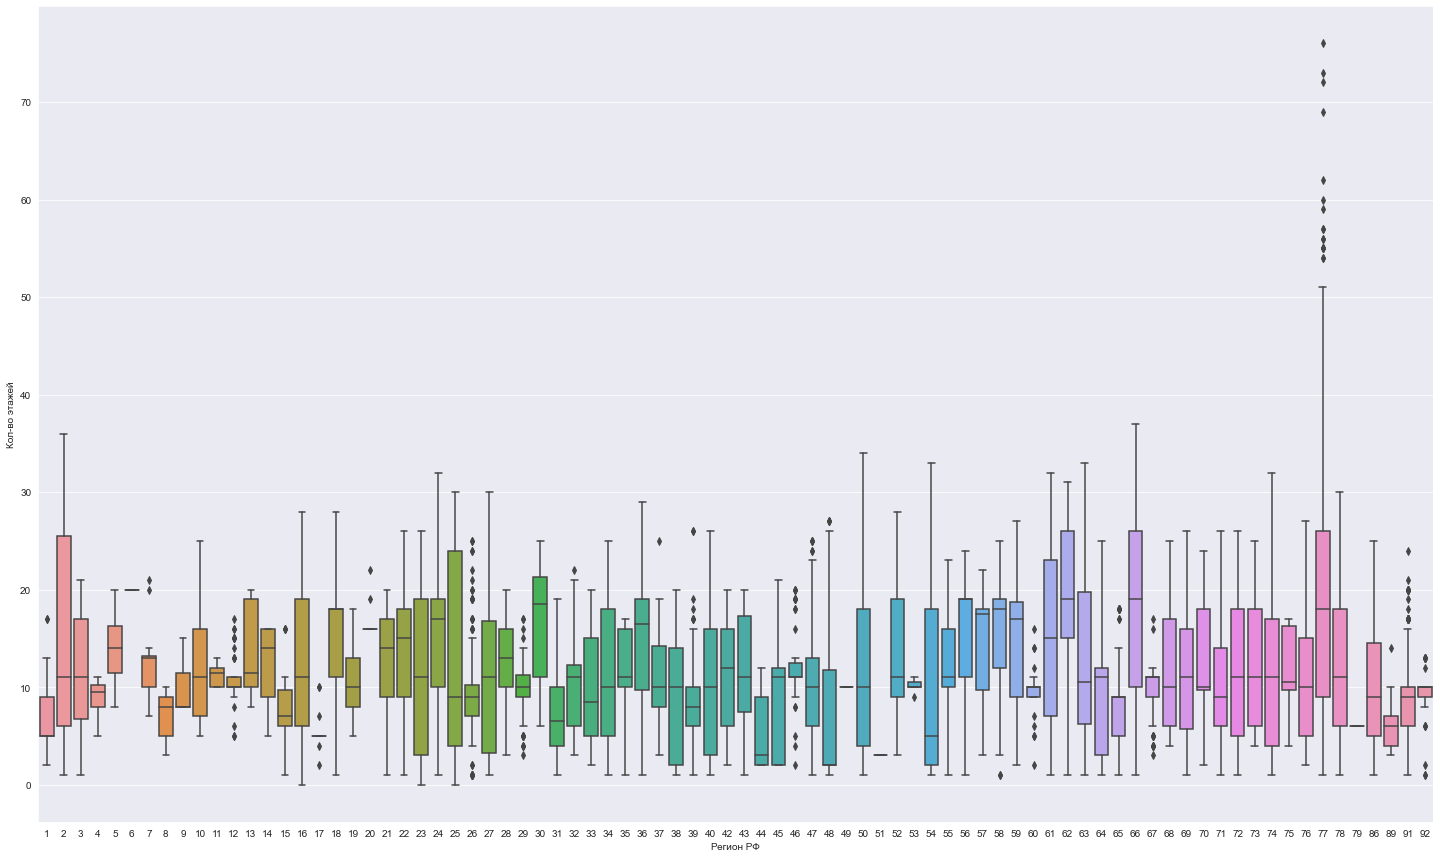

In [22]:
f, ax = plt.subplots(figsize=(25, 15))
sns.set_color_codes("pastel")
sns.boxplot(
    x="region",
    y="objFloorCnt",
    data=filtered_data
)
ax.set(ylabel='Кол-во этажей', xlabel='Регион РФ')
plt.show()

Из полученного графика можно сделать следующие выводы:
1. Большинство регионов имеют медианное значение этажности вводимых в строй зданий от 10 до 15
2. В большинстве регионов 75% вводимых в строй зданий имеют не более 20 этажей
3. По данному параметру лидер и антилидер такие же, как и в предыдущих исследованиях - в Мурманской области все новостройки в 3 этажа, а в Москве, помимо самого большого разброса, имеются выдающиеся строения - аномалии, этажность которых превышает 70

#### Количество квартир

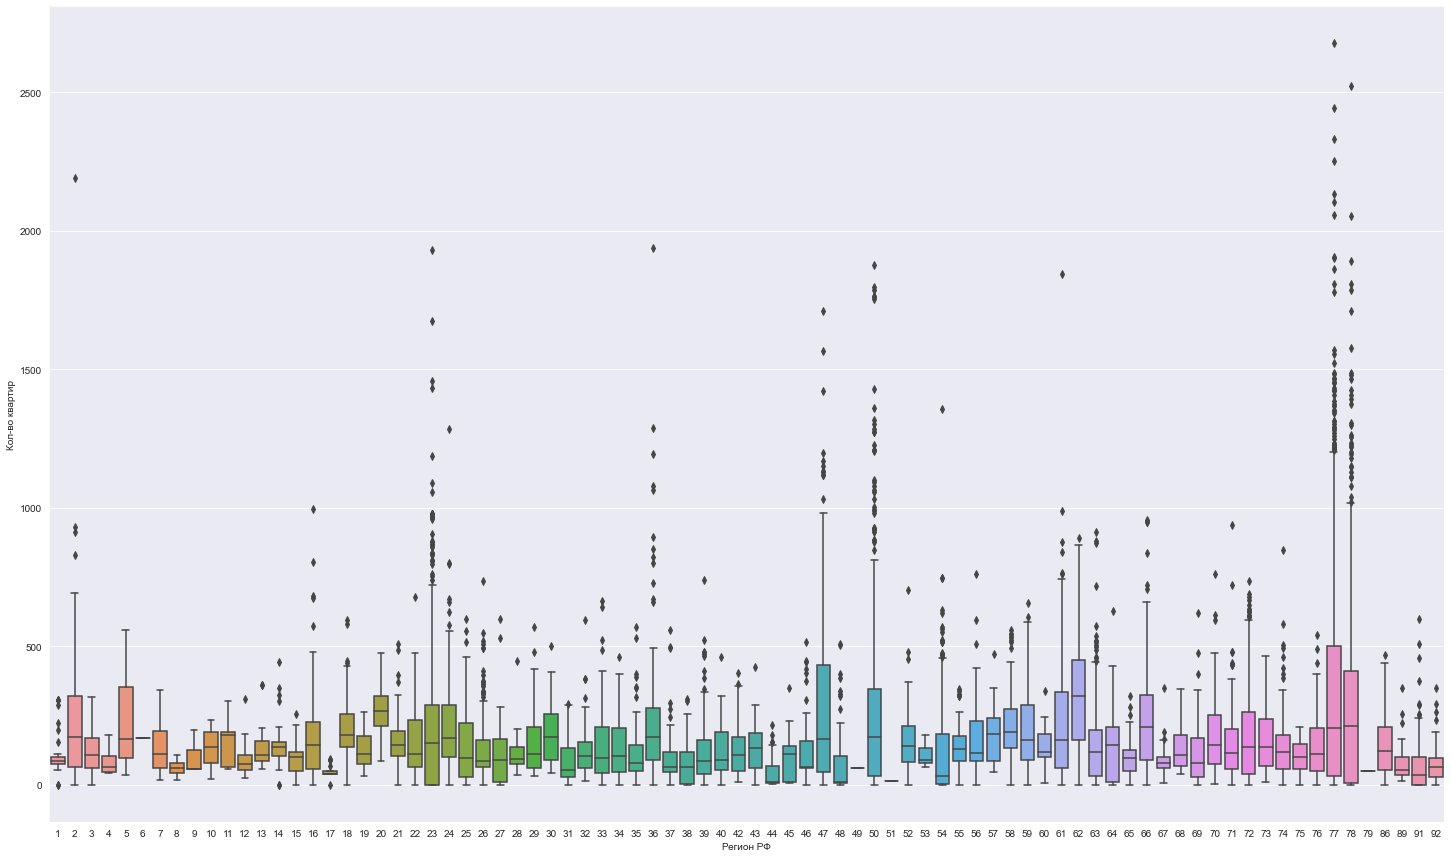

In [26]:
# строим ящики с усами
f, ax = plt.subplots(figsize=(25, 15))
sns.set_color_codes("pastel")
sns.boxplot(
    x="region",
    y="objFlatCnt",
    data=filtered_data
)
ax.set(ylabel='Кол-во квартир', xlabel='Регион РФ')
plt.show()

Ожидаемо, распределение количества квартир имеет большое сходство с распределением этажности, что вполне логично - кол-во квартир в большинстве случаев линейно зависит от кол-ва этажей

#### Количество парковочных мест

In [23]:
# для начала рассчитаем суммарное кол-во парковочных мест для каждого объекта
filtered_data['total_prk'] = filtered_data['objElemParkingCnt'] + filtered_data['objInfrstrObjPrkngCnt'] + filtered_data['objInfrstrNotObjPrkngCnt']

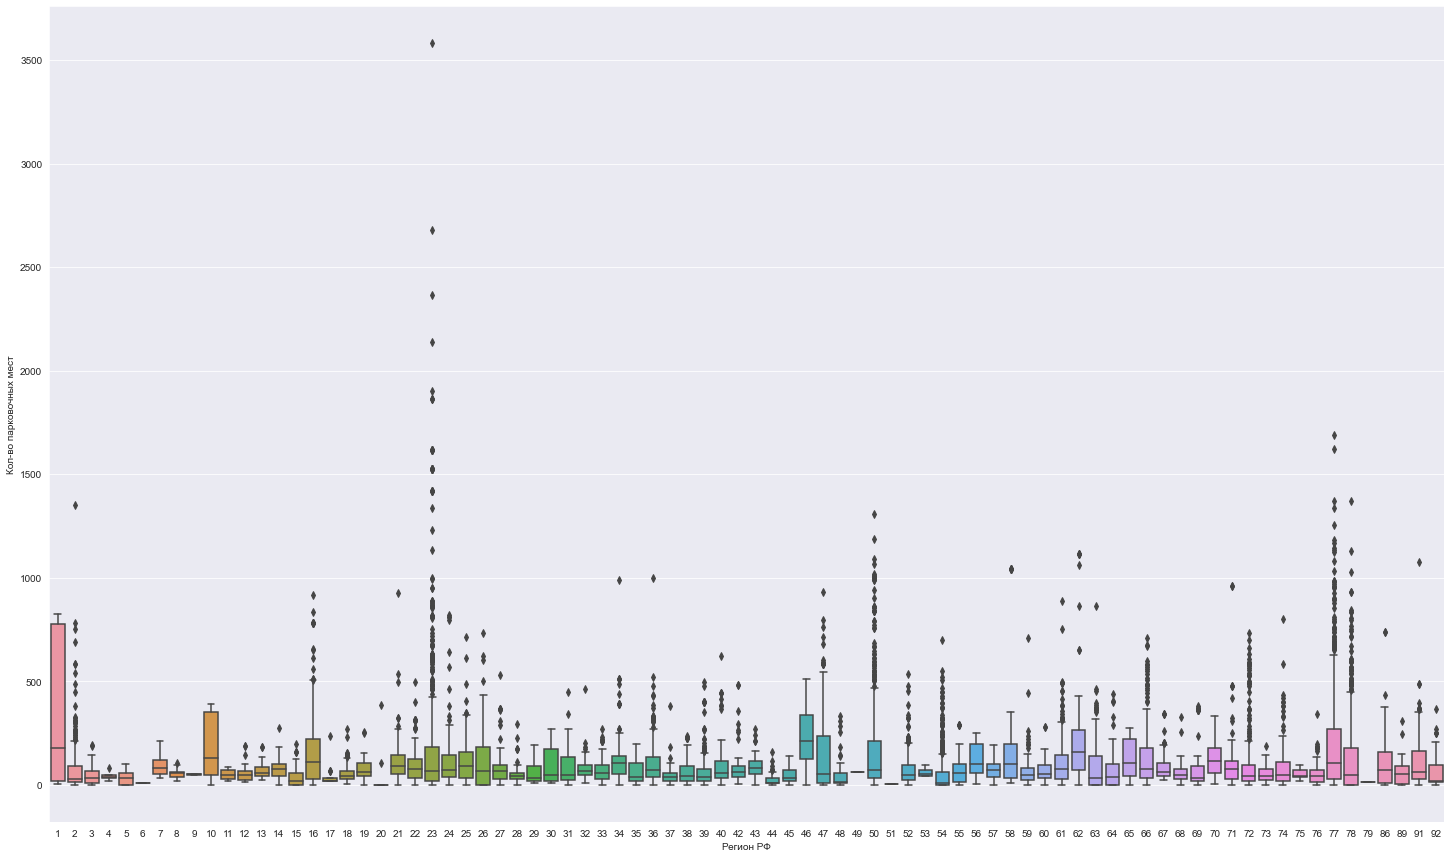

In [25]:
# строим ящики с усами
f, ax = plt.subplots(figsize=(25, 15))
sns.set_color_codes("pastel")
sns.boxplot(
    x="region",
    y="total_prk",
    data=filtered_data
)
ax.set(ylabel='Кол-во парковочных мест', xlabel='Регион РФ')
plt.show()

График отражает печальную примету нашего времени - в подавляющем большинстве случаев застройщики не обеспечивают достаточного числа парковочных мест для объектов. Медианное значение этого параметра для большинства регионов не превышает 100. Особенно грустно, если учесть, что мы исследовали суммарное число паркомест - паркинг + внутриобъектовые места + внешнеобъектовые. Но есть интересные исключения:
1. Республика Адыгея - при довольно скромной этажности вводимых в строй объектов обеспечивает довольно значительный разброс параметра, так что на некоторых объектах число паркомест превышает 750!
2. Самое интересное распределение в этот раз не в Москве, а в Краснодарском крае - вполне скромные показатели медианы и 75-го процентиля, но огромное количество аномальных значений, и абсолютный максимум, превышающий 3500 (!) мест

#### Жилая площадь

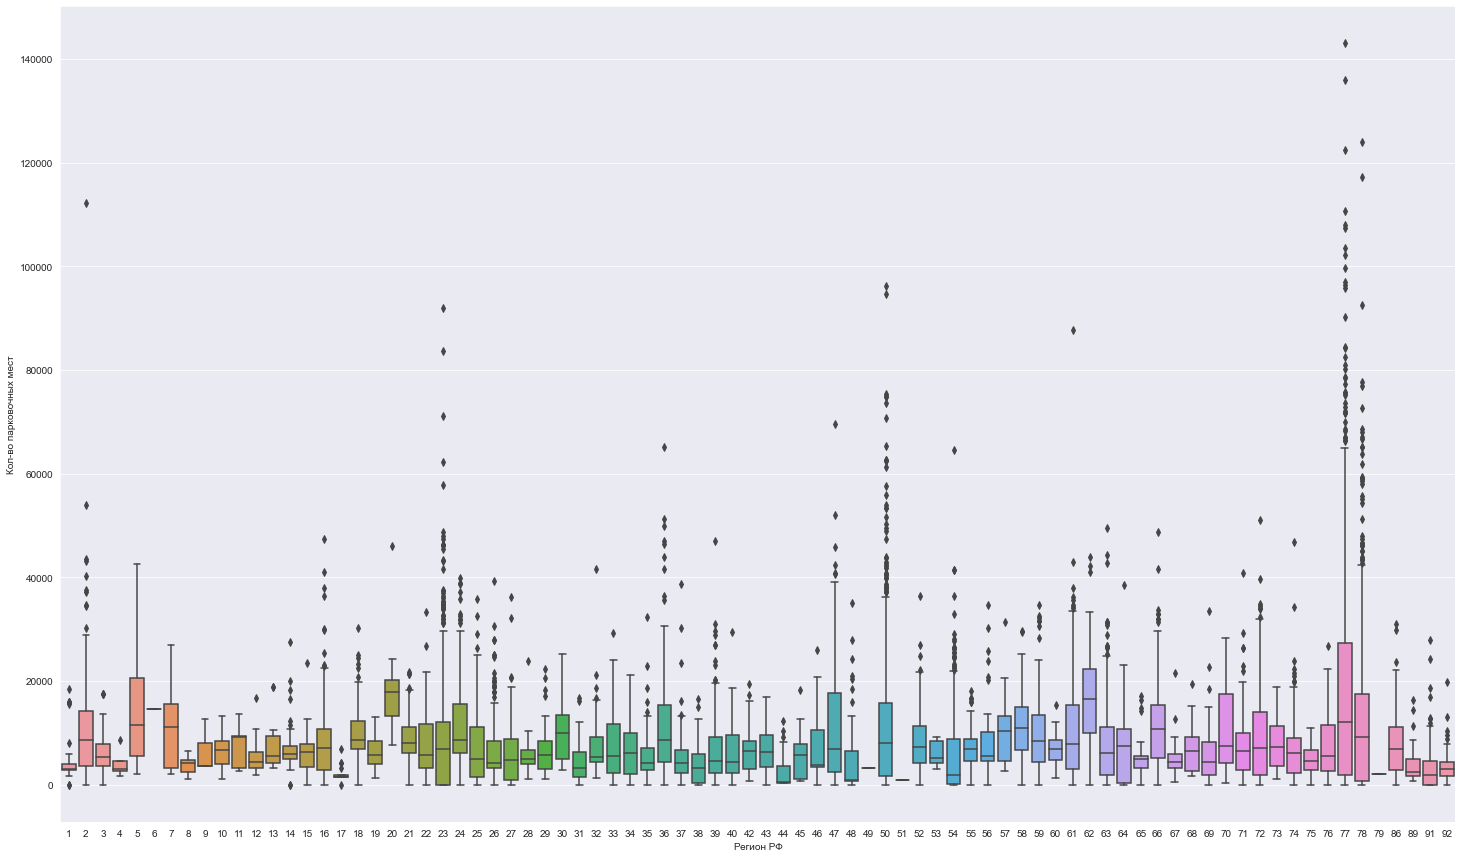

In [28]:
# строим ящики с усами
f, ax = plt.subplots(figsize=(25, 15))
sns.set_color_codes("pastel")
sns.boxplot(
    x="region",
    y="objFlatSq",
    data=filtered_data
)
ax.set(ylabel='Кол-во парковочных мест', xlabel='Регион РФ')
plt.show()

Распределение жилой площади также имеет сходство с распределением этажности и количества квартир, что неудивительно - площадь опять же в большинстве случаев линейно зависит от количества квартир

#### Цена за м²

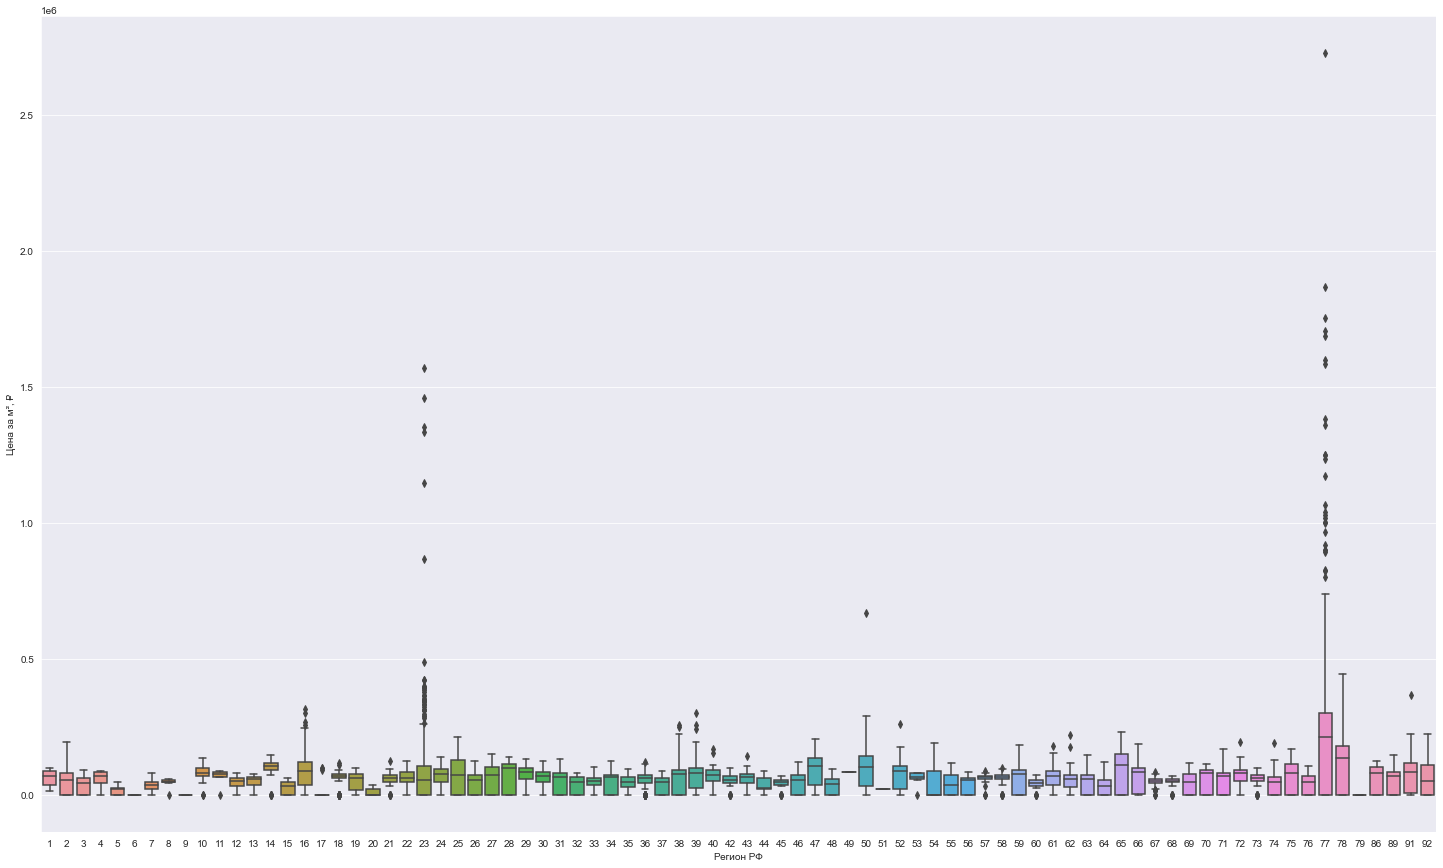

In [29]:
# строим ящики с усами
f, ax = plt.subplots(figsize=(25, 15))
sns.set_color_codes("pastel")
sns.boxplot(
    x="region",
    y="objPriceAvg",
    data=filtered_data
)
ax.set(ylabel='Цена за м², ₽', xlabel='Регион РФ')
plt.show()

Распределение средней цены за м² мы уже практически полностью описали при расчёте средней стоимости. Данный же график интересен в первую очередь тем, что показывает наличие в Краснодарском крае объектов с московскими ценами за жильё

## Выводы

1. По всем исследуемым показателям лидирует г. Москва
2. Практически по всем исследуемым показателям аутсайдер - Мурманская область
3. Распределения этажности, количества квартир и жилой площади очень похожи, т.к. данные параметры в большинстве случаев находятся в линейной зависимости друг от друга
4. Парковочных мест строят мало везде. Кроме Республики Адыгея, но там высок и разброс этого параметра
5. Жильё в Краснодарском крае может стоить столько же, сколько в г. Москва
6. Проведённое исследование не имеет практической ценности, т.к. не учитывает социально-экономические показатели регионов, и потому не может быть использовано для каких-либо прогнозов или серьёзных выводов